In [132]:
# Data Processing
import pandas as pd
import numpy as np


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from wordcloud import WordCloud


# Text Preprocessing
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer , WordNetLemmatizer, LancasterStemmer
import re


# Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Data preprocessing for Machine Learning Model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Machine Learning 
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_confusion_matrix, plot_roc

# Over sampling & Under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [133]:
# Reading Data
student_depression = pd.read_excel("dataset.xlsx")
student_depression.head(10)

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0
5,"every break, you must be nervous, like somethi...",1.0
6,"I feel scared, anxious, what can I do? And may...",1.0
7,Have you ever felt nervous but didn't know why?,1.0
8,"I haven't slept well for 2 days, it's like I'm...",1.0
9,"I'm really worried, I want to cry.",1.0


In [134]:
student_depression.isnull().sum()

text     10
label     2
dtype: int64

In [135]:
student_depression = student_depression.dropna(how="any")

In [136]:
student_depression["label"].value_counts() 

0.0    6240
1.0     730
Name: label, dtype: int64

0 - A student does not suffer from depression
<br>
1 - A student does suffer from depression

The table clearly shows that there are more students that don't suffer from depression.

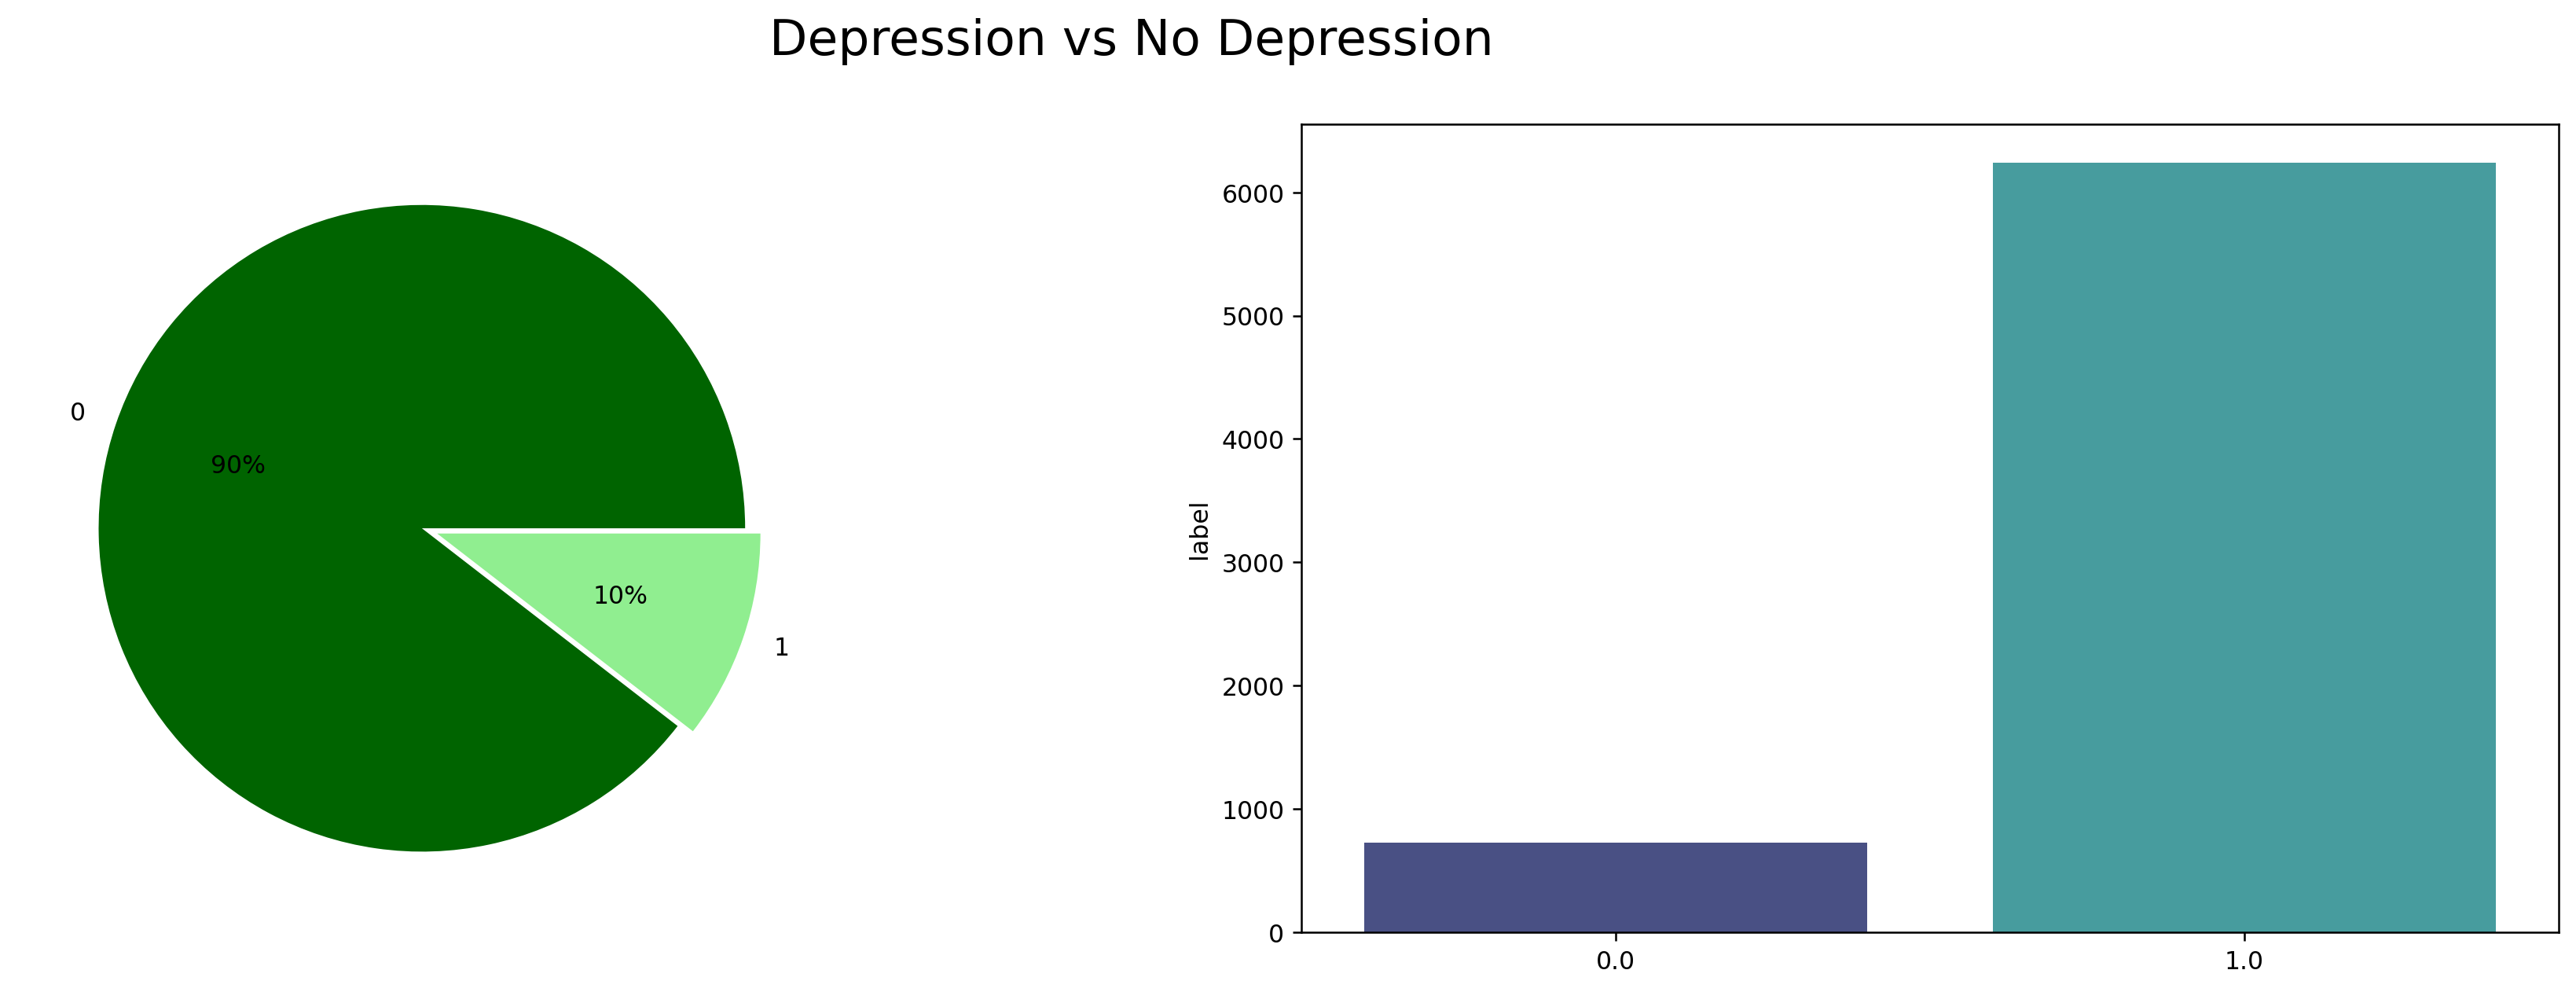

In [137]:
labels = [0,1]
sizes = [6240,730]

plt.figure(figsize=(20,6),dpi=227)
plt.subplot(1,2,1)
plt.pie(sizes, labels=labels,autopct = '%1.0f%%', explode=[0,0.05], colors = ['darkgreen', 'lightgreen'])

plt.subplot(1,2,2)
sns.barplot(x = student_depression["label"].unique(),y = student_depression["label"].value_counts(), palette = "mako")


plt.suptitle("Depression vs No Depression",fontsize = 20)
plt.show()

# Adding Features

In [138]:
def total_chars(data):
    counter = 0
    for word in data.split():
        counter += len(word)
    return counter

def total_punc(data):
    counter = 0
    for i in range(len(data)):
        if data[i] in punctuation:
            counter += 1
    return counter

def total_vowels(data):
    counter = 0
    for word in word_tokenize(data):
        for letter in word.lower():
            if letter in "aeiou":
                counter += 1
    return counter

student_depression["total_words"] = student_depression["text"].apply(lambda x: len(x.split(" ")))

student_depression["total_chars"] = student_depression["text"].apply(total_chars)

student_depression["total_vowels"] = student_depression["text"].apply(lambda x:total_vowels(x))


# Total Number of Words: In Depression vs Not In Depression

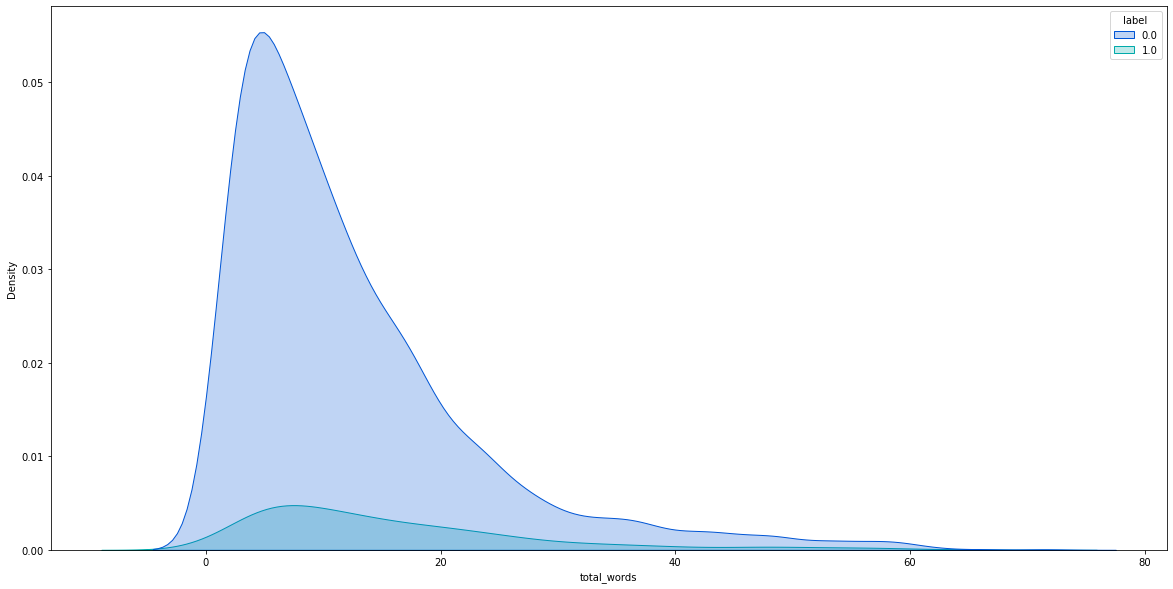

In [139]:
plt.figure(figsize = (20, 10))
sns.kdeplot(x = student_depression['total_words'], 
            hue= student_depression['label'],
            palette= 'winter', 
            shade = True)
plt.show()

# Total Number of Characters: In Depression vs Not In Depression

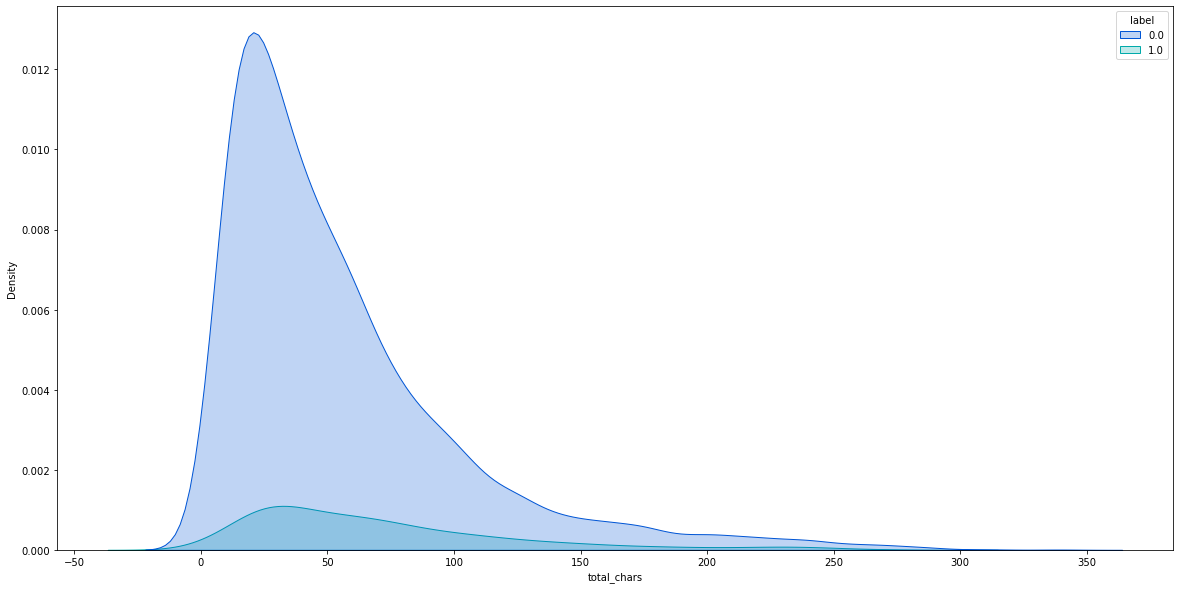

In [140]:
plt.figure(figsize = (20, 10))
sns.kdeplot(x = student_depression['total_chars'], 
            hue= student_depression['label'],
            palette= 'winter', 
            shade = True)
plt.show()

# Total Number of Vowels: In Depression Vs Not In Depression

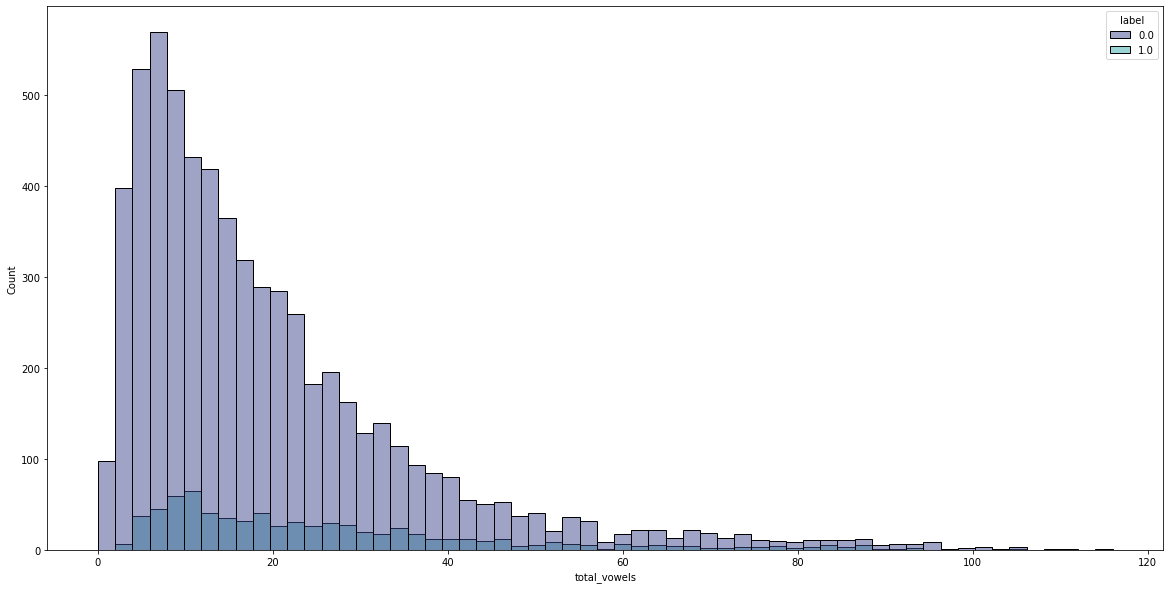

In [141]:
plt.figure(figsize = (20, 10))
sns.histplot(x = student_depression['total_vowels'], 
            hue= student_depression['label'],
            palette= 'mako')
plt.show()

# Text Preprocessing

In [142]:
stop_words = stopwords.words("english")
stemmer = PorterStemmer()
lematizer = WordNetLemmatizer()

def remove_puncs(text): # Removing punctuations
    punc_free = ''.join([char for char in text if char not in punctuation])
    return punc_free

def remove_stop_words(text): # Stop words remover
    stop_words_free = [word for word in text if word not in stop_words]
    return stop_words_free

def remove_numbers(text):
    res = ''
    numbers_free = []
    for word in text:
        for c in word:
            if not c.isdigit():
                res += c
        numbers_free.append(res)
        res = ''
    return numbers_free

def stemming(text): # Stem the word with losing the meaning 
    stemmed_text = [stemmer.stem(word) for word in text]
    return stemmed_text

def lemmatizator(text): # Stem the words without losing the meaning
    lema_text = [lematizer.lemmatize(word) for word in text]
    return lema_text

student_depression["original_text"] = student_depression["text"] # New col to hold the original text.
student_depression["text"] = student_depression["text"].apply(lambda x: remove_puncs(x)) # Removing punctuations
student_depression["text"] = student_depression["text"].apply(lambda x : x.lower()) # lower case every sentence
student_depression["text"] = student_depression["text"].apply(lambda x : word_tokenize(x)) # list of all words.
student_depression["text"] = student_depression["text"].apply(lambda x : remove_stop_words(x)) # Stop words remover
student_depression["text"] = student_depression["text"].apply(lambda x : lemmatizator(x)) # Stem without losing meaning
student_depression["text"] = student_depression["text"].apply(lambda x: remove_numbers(x)) # removing numbers
student_depression["text"] = student_depression["text"].apply(lambda x : ' '.join(x)) # New Text.
student_depression.head()

,text,label,total_words,total_chars,total_vowels,original_text
0,oh gosh,1.0,3,8,2,oh my gosh
1,trouble sleeping confused mind restless heart ...,1.0,10,55,20,"trouble sleeping, confused mind, restless hear..."
2,wrong back dear forward doubt stay restless re...,1.0,14,65,20,"All wrong, back off dear, forward doubt. Stay ..."
3,ive shifted focus something else im still worried,1.0,11,51,18,I've shifted my focus to something else but I'...
4,im restless restless month boy mean,1.0,14,59,19,"I'm restless and restless, it's been a month n..."


# Most commonly used words when in depression & not in depression

In [143]:
def most_used_words(list_of_sentences, cols_names):
    res = []
    for sentence in list_of_sentences:
        for word in sentence.split():
            res.append(word)
    return pd.DataFrame(Counter(res).most_common(25),columns=cols_names)

no_dep_sentences = student_depression[student_depression["label"] == 0]["text"].to_list()
dep_sentences = student_depression[student_depression["label"] == 1]["text"].to_list()

no_dep_words_df = most_used_words(no_dep_sentences,
                                  ["No Dep Words","Frequency"]).sort_values("Frequency", ascending=False)
dep_words_df = most_used_words(dep_sentences, 
                               ["Dep Words","Frequency"]).sort_values("Frequency", ascending=False)

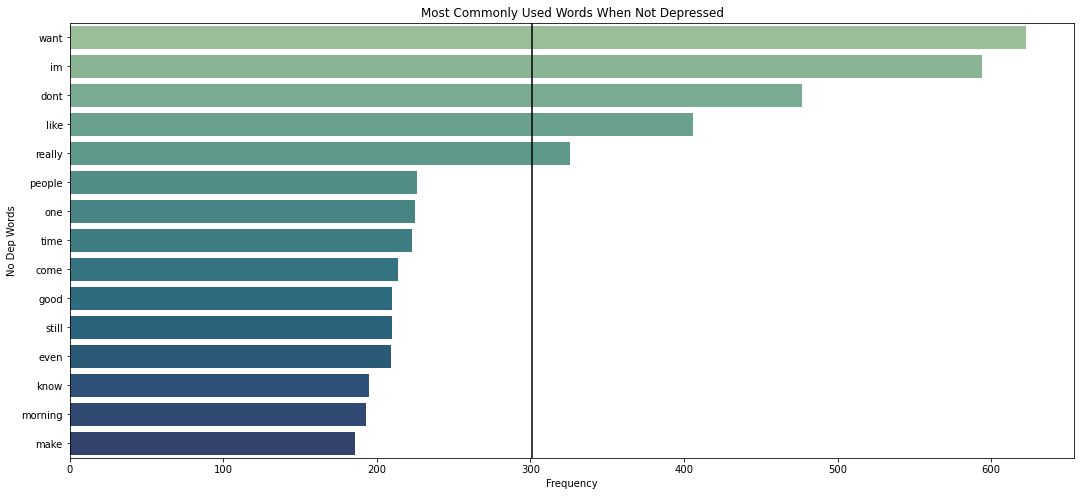

In [144]:
plt.figure(figsize=(18,8))
plt.title("Most Commonly Used Words When Not Depressed")
fig = sns.barplot(y=no_dep_words_df["No Dep Words"].head(15),
                  x=no_dep_words_df["Frequency"].head(15), 
                  palette= 'crest')

line = plt.axvline(x=no_dep_words_df["Frequency"].head(15).mean(),
            color='black')

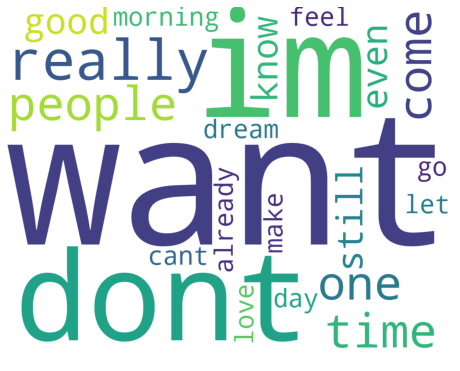

In [145]:
no_dep_words = no_dep_words_df["No Dep Words"].to_list()

plt.subplots(figsize=(8,8))

no_dep_words_cloud = WordCloud(
    background_color = 'white',
    width = 1000,
    height = 800
).generate(' '.join(no_dep_words))

plt.imshow(no_dep_words_cloud)
plt.axis('off')
plt.show()

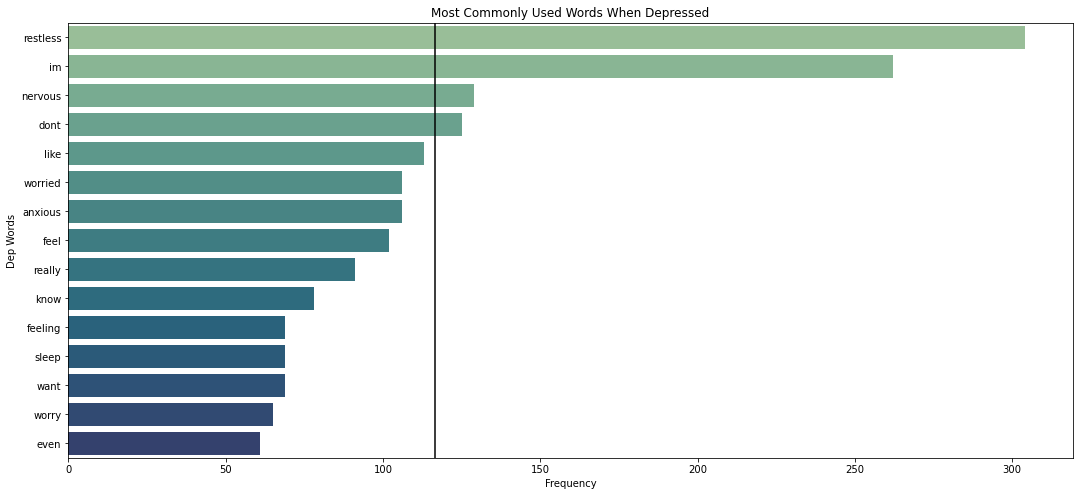

In [146]:
plt.figure(figsize=(18,8))
plt.title("Most Commonly Used Words When Depressed")
fig = sns.barplot(y=dep_words_df["Dep Words"].head(15),
                  x=dep_words_df["Frequency"].head(15), 
                  palette= 'crest')
line = plt.axvline(x=dep_words_df["Frequency"].head(15).mean(),
            color='black')

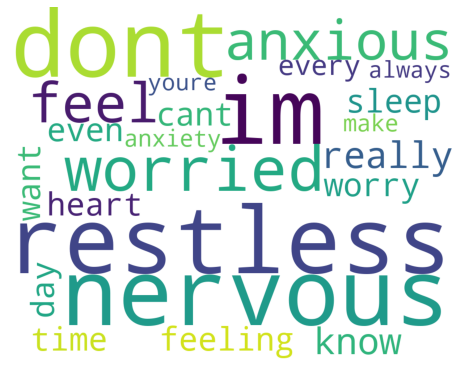

In [147]:
dep_words = dep_words_df["Dep Words"].to_list()

plt.subplots(figsize=(8,8))

dep_words_cloud = WordCloud(
    background_color = 'white',
    width = 1000,
    height = 800
).generate(' '.join(dep_words))

plt.imshow(dep_words_cloud)
plt.axis('off')
plt.show()

# Sentimental Analysis

## Positive & Negative Analysis

In [148]:
analyzer = SentimentIntensityAnalyzer()

student_depression['rating'] = student_depression['text'].apply(analyzer.polarity_scores)
student_depression = pd.concat([student_depression.drop(['rating'], axis=1), 
                                student_depression['rating'].apply(pd.Series)], axis=1)

student_depression.rename(columns = {"neg":"negative",
                                     "neu":"neutral",
                                     "pos":"positive"},inplace=True)


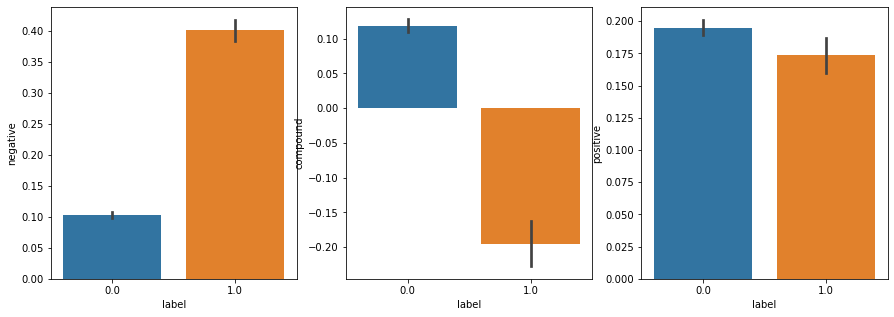

In [149]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
fig = sns.barplot(data = student_depression, x= "label",y="negative",ax=axs[0])
fig = sns.barplot(data = student_depression, x= "label",y="compound", ax=axs[1])
fig = sns.barplot(data = student_depression, x= "label",y="positive",ax=axs[2])

By plotting these bar plots I can clearly tell that most of the students in depression will post a negative text. However, it seems that some of the texts labeled as a depression text are also positive in one way or another.

# Test & Train Split

In [150]:
text = student_depression["text"]
labels = student_depression['label'].values

text_train, text_test, labels_train, labels_test = train_test_split(text, labels, 
                                                                    test_size= 0.2, 
                                                                    random_state= 42, 
                                                                    stratify = labels)

tfidf = TfidfVectorizer()
text_train = tfidf.fit_transform(text_train).toarray()
text_test = tfidf.transform(text_test).toarray()

In [66]:
def model_training(model,feature_train,target_train):
    model.fit(feature_train,target_train)
    labels_pred = model.predict(text_test)
    labels_prob = model.predict_proba(text_test)
    accu = round(accuracy_score(labels_test,labels_pred),3)
    precision = round(precision_score(labels_test,labels_pred),3)
    recall = round(recall_score(labels_test, labels_pred), 3)
    print(f"Model's Accuracy:{accu}")
    print(f"Model's Precision:{precision}")
    print(F"Model's recall:{recall}")
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(labels_test, labels_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(labels_test, labels_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

# Multinomial Naive Bayes

Model's Accuracy:0.936
Model's Precision:1.0
Model's recall:0.39


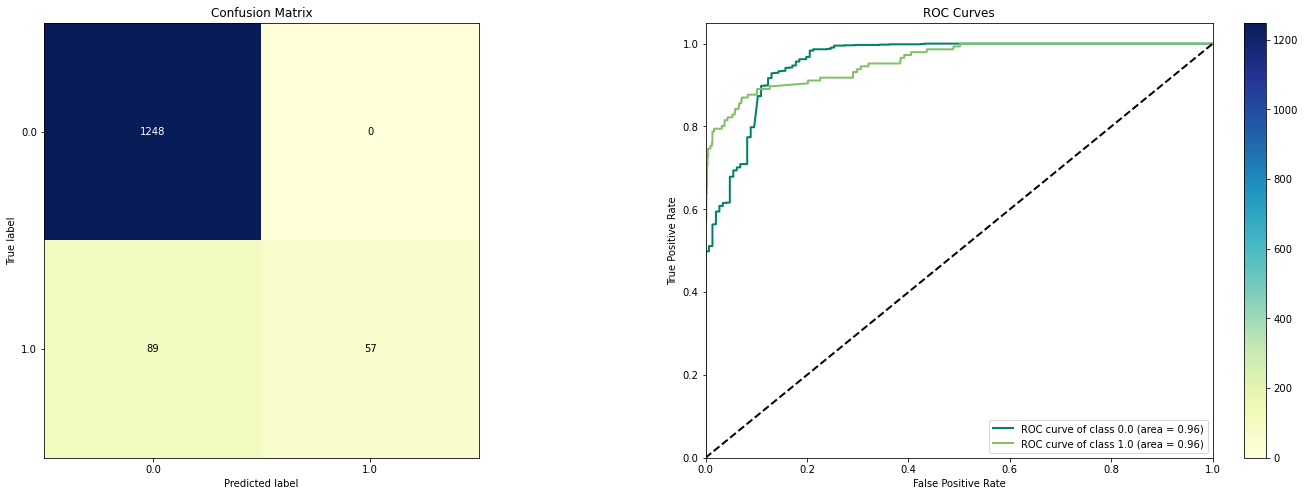

In [70]:
nb = MultinomialNB()
model_training(nb,text_train,labels_train)

# Random Forest 

Model's Accuracy:0.989
Model's Precision:0.978
Model's recall:0.911


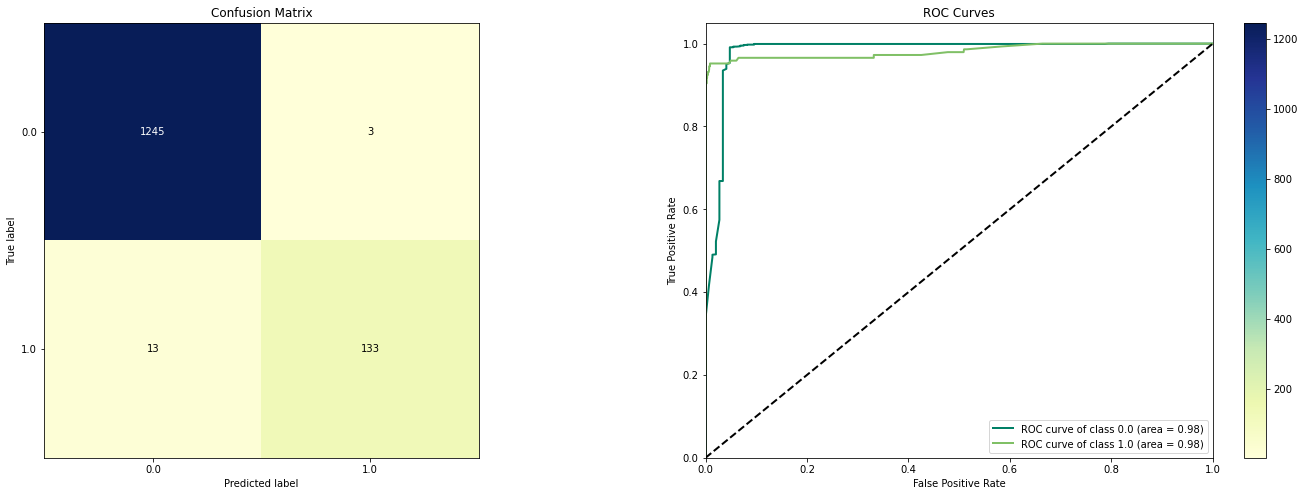

In [69]:
rf = RandomForestClassifier(n_estimators=200)
model_training(rf,text_train,labels_train)

Since random forest seems to be a better approach to this problem, I'll keep using this model while trying to over sample/under sample the data with different methods.

# Over Sampling

In [158]:
ros = RandomOverSampler(random_state=42)
text_train_ros, labels_train_ros = ros.fit_resample(text_train,labels_train)
print(sorted(Counter(labels_train_ros).items()))

[(0.0, 4992), (1.0, 4992)]


Model's Accuracy:0.989
Model's Precision:0.964
Model's recall:0.925


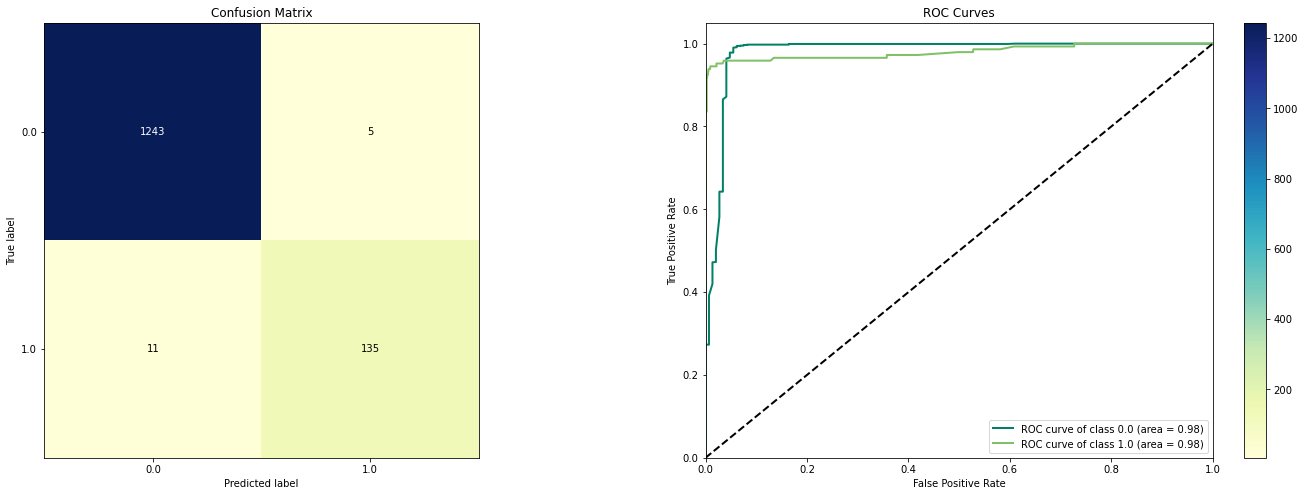

In [68]:
model_training(rf,text_train_ros,labels_train_ros)

With over sampling I got the same accuracy, the precision deacresed a little but the model's recall is higher.<br>
The over sampling made the model to predict more as true positive, since recall is the proportion of true positive out of the sum of true positive and false negative.

# Under Sampling

In [159]:
ros = RandomUnderSampler(random_state=42)
text_train_ros, labels_train_ros = ros.fit_resample(text_train,labels_train)
print(sorted(Counter(labels_train_ros).items()))

[(0.0, 584), (1.0, 584)]


Model's Accuracy:0.956
Model's Precision:0.721
Model's recall:0.938


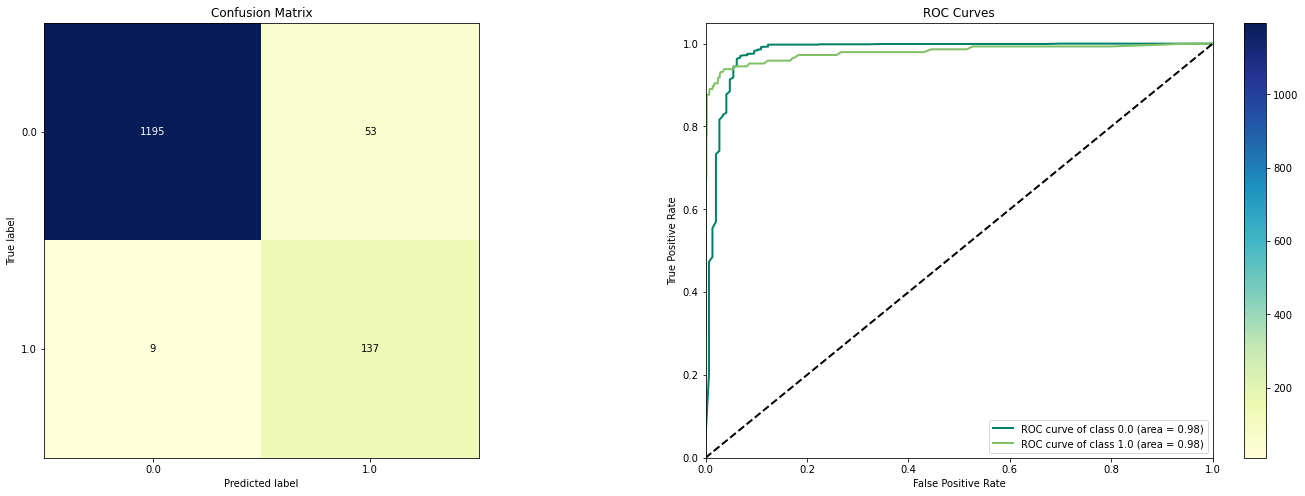

In [160]:
model_training(rf,text_train_ros,labels_train_ros)

With under sampling everything but the recall decreased.<br>
It seems that with under sampling I managed to decrease the amount of true negatives and to predict more true positives.<br>
In terms of accuracy over sampling and the normal state are probably better. On the first hand, when doing under sampling the model predicted more true positive which is great but on the other hand it predicted more false positive and more false negative. Therefore, I'll choose using over sampling or staying at the normal state of the data.